In [1]:
import pandas as pd

In [5]:
df=pd.read_csv("../Datasets/cleaned_dataset.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59832 entries, 0 to 59831
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Description          59832 non-null  object 
 1   Location             59832 non-null  object 
 2   Transaction          59832 non-null  object 
 3   Furnishing           59832 non-null  object 
 4   Facing               59832 non-null  object 
 5   Overlooking          59832 non-null  object 
 6   Society              59832 non-null  object 
 7   Bathroom             59832 non-null  int64  
 8   Balcony              59832 non-null  int64  
 9   Ownership            59832 non-null  object 
 10  BHK                  59832 non-null  int64  
 11  Amount               59832 non-null  float64
 12  Area                 59832 non-null  float64
 13  Type of Car Parking  59832 non-null  object 
 14  No of Car Parking    59832 non-null  int64  
 15  Sale Floor           59832 non-null 

In [7]:
df.BHK.value_counts()

BHK
3     25591
2     23127
4      5371
1      5132
5       496
6        77
7        14
10       12
8         7
9         5
Name: count, dtype: int64

In [8]:
df["Society"].value_counts()

Society
Standlone Building       33863
Sushma Grande              105
RPS Savana                  99
Sushma Valencia             96
DLF The Valley Garden       82
                         ...  
Ambika Apartment             1
Shri Niketan                 1
DDA Rose Apartments          1
Sita Ram Apartments          1
Jaivee Radha Enclave         1
Name: count, Length: 9625, dtype: int64

In [7]:
df.drop("Society",axis=1,inplace=True)

##Splitting into input and output

In [8]:
y=df["Amount"]
X=df.drop("Amount",axis=1)

In [9]:
y

0         42.0
1         98.0
2        140.0
3         25.0
4        160.0
         ...  
59827     63.0
59828     55.0
59829     76.0
59830     30.0
59831    118.0
Name: Amount, Length: 59832, dtype: float64

In [10]:

X.head()

,Description,Location,Transaction,Furnishing,Facing,Overlooking,Bathroom,Balcony,Ownership,BHK,Area,Type of Car Parking,No of Car Parking,Sale Floor,Total Floors
0,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",thane,Resale,Unfurnished,Not Mentioned,Not Available,1,2,Not Mentioned,1,500.0,Not_Available,0,10,11
1,One can find this stunning 2 BHK flat for sale...,thane,Resale,Semi-Furnished,East,Garden/Park,2,0,Freehold,2,473.0,Open,1,3,22
2,Up for immediate sale is a 2 BHK apartment in ...,thane,Resale,Unfurnished,East,Garden/Park,2,0,Freehold,2,779.0,Covered,1,10,29
3,This beautiful 1 BHK Flat is available for sal...,thane,Resale,Unfurnished,Not Mentioned,Not Available,1,1,Not Mentioned,1,530.0,Not_Available,0,1,3
4,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",thane,Resale,Unfurnished,West,"Garden/Park, Main Road",2,0,Co-operative Society,2,635.0,Covered,1,20,42


##Splitting into Train and Test

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.85,random_state=1)

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((50857, 15), (8975, 15), (50857,), (8975,))

In [13]:
X_train.head()

,Description,Location,Transaction,Furnishing,Facing,Overlooking,Bathroom,Balcony,Ownership,BHK,Area,Type of Car Parking,No of Car Parking,Sale Floor,Total Floors
12344,This attractive 5 BHK apartment can be found f...,gurgaon,New Property,Unfurnished,East,"Garden/Park, Pool, Main Road",5,5,Freehold,5,4031.0,Covered,5,10,20
47093,4BHK APARTMENT FOR SALE IN GOOD CONDITION IN D...,panchkula,Resale,Unfurnished,East,"Garden/Park, Pool, Main Road",5,4,Freehold,4,2400.0,Open,1,1,2
45901,Have a look at this immaculate 3 BHK flat for ...,mohali,Resale,Semi-Furnished,North - East,Garden/Park,3,2,Freehold,3,1300.0,Not_Available,0,12,13
2206,4 BHK flat available for sale in Mumbai in the...,mumbai,Resale,Semi-Furnished,Not Mentioned,Garden/Park,4,1,Not Mentioned,4,2000.0,Not_Available,0,20,25
1783,"Juhu, Mumbai has an appealing 3 BHK flat for s...",mumbai,Resale,Furnished,West,Main Road,3,1,Freehold,3,1400.0,Covered,2,10,14


##Data Transformation

###Numerical

In [14]:
X_train_num=X_train.select_dtypes(include=["int64","float64"])

In [15]:
X_train_num

,Bathroom,Balcony,BHK,Area,No of Car Parking,Sale Floor,Total Floors
12344,5,5,5,4031.0,5,10,20
47093,5,4,4,2400.0,1,1,2
45901,3,2,3,1300.0,0,12,13
2206,4,1,4,2000.0,0,20,25
1783,3,1,3,1400.0,2,10,14
...,...,...,...,...,...,...,...
50057,3,0,3,1600.0,0,2,12
32511,2,2,2,800.0,1,1,3
5192,3,2,3,1637.0,1,0,5
12172,2,1,2,800.0,0,1,6


In [16]:
X_test_num=X_test.select_dtypes(include=["int64","float64"])

In [17]:
X_test_num

,Bathroom,Balcony,BHK,Area,No of Car Parking,Sale Floor,Total Floors
31251,2,1,2,1250.0,0,1,2
46140,2,2,3,1000.0,1,2,3
32723,3,2,3,2000.0,0,2,2
39748,2,2,3,975.0,1,3,4
11625,3,2,3,1100.0,1,0,12
...,...,...,...,...,...,...,...
59752,3,4,3,1550.0,1,5,14
46923,2,0,1,360.0,0,4,4
28305,1,0,2,650.0,0,15,15
757,2,2,2,600.0,1,16,16


In [18]:
#Since all the numerical columns has outliers, we use numerical columns
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

X_train_num_transformed=pd.DataFrame(scaler.fit_transform(X_train_num),index=X_train_num.index,columns=X_train_num.columns)

In [19]:
X_test_num_transformed=pd.DataFrame(scaler.transform(X_test_num),index=X_test_num.index,columns=X_test_num.columns)

In [20]:
X_train_num_transformed

,Bathroom,Balcony,BHK,Area,No of Car Parking,Sale Floor,Total Floors
12344,3.0,3.0,2.0,4.236765,5.0,2.333333,1.875
47093,3.0,2.0,1.0,1.838235,1.0,-0.666667,-0.375
45901,1.0,0.0,0.0,0.220588,0.0,3.000000,1.000
2206,2.0,-1.0,1.0,1.250000,0.0,5.666667,2.500
1783,1.0,-1.0,0.0,0.367647,2.0,2.333333,1.125
...,...,...,...,...,...,...,...
50057,1.0,-2.0,0.0,0.661765,0.0,-0.333333,0.875
32511,0.0,0.0,-1.0,-0.514706,1.0,-0.666667,-0.250
5192,1.0,0.0,0.0,0.716176,1.0,-1.000000,0.000
12172,0.0,-1.0,-1.0,-0.514706,0.0,-0.666667,0.125


In [21]:
X_test_num_transformed

,Bathroom,Balcony,BHK,Area,No of Car Parking,Sale Floor,Total Floors
31251,0.0,-1.0,-1.0,0.147059,0.0,-0.666667,-0.375
46140,0.0,0.0,0.0,-0.220588,1.0,-0.333333,-0.250
32723,1.0,0.0,0.0,1.250000,0.0,-0.333333,-0.375
39748,0.0,0.0,0.0,-0.257353,1.0,0.000000,-0.125
11625,1.0,0.0,0.0,-0.073529,1.0,-1.000000,0.875
...,...,...,...,...,...,...,...
59752,1.0,2.0,0.0,0.588235,1.0,0.666667,1.125
46923,0.0,-2.0,-2.0,-1.161765,0.0,0.333333,-0.125
28305,-1.0,-2.0,-1.0,-0.735294,0.0,4.000000,1.250
757,0.0,0.0,-1.0,-0.808824,1.0,4.333333,1.375


###Categorical

In [22]:
X_train_cat=X_train.select_dtypes(include="object").drop("Description",axis=1)

In [23]:
X_test_cat=X_test.select_dtypes(include="object").drop("Description",axis=1)

In [24]:
X_train_cat

,Location,Transaction,Furnishing,Facing,Overlooking,Ownership,Type of Car Parking
12344,gurgaon,New Property,Unfurnished,East,"Garden/Park, Pool, Main Road",Freehold,Covered
47093,panchkula,Resale,Unfurnished,East,"Garden/Park, Pool, Main Road",Freehold,Open
45901,mohali,Resale,Semi-Furnished,North - East,Garden/Park,Freehold,Not_Available
2206,mumbai,Resale,Semi-Furnished,Not Mentioned,Garden/Park,Not Mentioned,Not_Available
1783,mumbai,Resale,Furnished,West,Main Road,Freehold,Covered
...,...,...,...,...,...,...,...
50057,sonipat,Resale,Unfurnished,Not Mentioned,Not Available,Not Mentioned,Not_Available
32511,faridabad,New Property,Semi-Furnished,North,"Garden/Park, Pool, Main Road",Freehold,Covered
5192,bangalore,Resale,Semi-Furnished,East,Garden/Park,Freehold,Covered
12172,gurgaon,Resale,Unfurnished,Not Mentioned,Not Available,Not Mentioned,Not_Available


In [25]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()

In [26]:
X_train_cat_labeled=pd.DataFrame(encoder.fit_transform(X_train_cat),index=X_train_cat.index,columns=X_train_cat.columns)

In [27]:

X_test_cat_labeled=pd.DataFrame(encoder.transform(X_test_cat),index=X_test_cat.index,columns=X_test_cat.columns)

In [28]:
X_train_cat_labeled

,Location,Transaction,Furnishing,Facing,Overlooking,Ownership,Type of Car Parking
12344,23.0,0.0,2.0,0.0,3.0,1.0,0.0
47093,54.0,2.0,2.0,0.0,3.0,1.0,2.0
45901,42.0,2.0,1.0,2.0,0.0,1.0,1.0
2206,43.0,2.0,1.0,4.0,0.0,3.0,1.0
1783,43.0,2.0,0.0,8.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...
50057,65.0,2.0,2.0,4.0,6.0,3.0,1.0
32511,18.0,0.0,1.0,1.0,3.0,1.0,0.0
5192,6.0,2.0,1.0,0.0,0.0,1.0,0.0
12172,23.0,2.0,2.0,4.0,6.0,3.0,1.0


In [29]:
X_test_cat_labeled

,Location,Transaction,Furnishing,Facing,Overlooking,Ownership,Type of Car Parking
31251,15.0,0.0,0.0,5.0,6.0,1.0,1.0
46140,44.0,0.0,2.0,5.0,4.0,1.0,0.0
32723,18.0,2.0,2.0,4.0,1.0,1.0,1.0
39748,21.0,0.0,1.0,2.0,4.0,1.0,0.0
11625,23.0,2.0,1.0,0.0,7.0,1.0,0.0
...,...,...,...,...,...,...,...
59752,80.0,0.0,1.0,1.0,4.0,1.0,0.0
46923,53.0,2.0,1.0,4.0,6.0,3.0,1.0
28305,8.0,2.0,1.0,4.0,6.0,3.0,1.0
757,67.0,2.0,2.0,2.0,1.0,0.0,2.0


##Concating Transformed Features

In [30]:
X_train_transformed=pd.concat([X_train_num_transformed,X_train_cat_labeled],axis=1)

In [31]:
X_test_transformed=pd.concat([X_test_num_transformed,X_test_cat_labeled],axis=1)

In [32]:
X_train_transformed

,Bathroom,Balcony,BHK,Area,No of Car Parking,Sale Floor,Total Floors,Location,Transaction,Furnishing,Facing,Overlooking,Ownership,Type of Car Parking
12344,3.0,3.0,2.0,4.236765,5.0,2.333333,1.875,23.0,0.0,2.0,0.0,3.0,1.0,0.0
47093,3.0,2.0,1.0,1.838235,1.0,-0.666667,-0.375,54.0,2.0,2.0,0.0,3.0,1.0,2.0
45901,1.0,0.0,0.0,0.220588,0.0,3.000000,1.000,42.0,2.0,1.0,2.0,0.0,1.0,1.0
2206,2.0,-1.0,1.0,1.250000,0.0,5.666667,2.500,43.0,2.0,1.0,4.0,0.0,3.0,1.0
1783,1.0,-1.0,0.0,0.367647,2.0,2.333333,1.125,43.0,2.0,0.0,8.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,1.0,-2.0,0.0,0.661765,0.0,-0.333333,0.875,65.0,2.0,2.0,4.0,6.0,3.0,1.0
32511,0.0,0.0,-1.0,-0.514706,1.0,-0.666667,-0.250,18.0,0.0,1.0,1.0,3.0,1.0,0.0
5192,1.0,0.0,0.0,0.716176,1.0,-1.000000,0.000,6.0,2.0,1.0,0.0,0.0,1.0,0.0
12172,0.0,-1.0,-1.0,-0.514706,0.0,-0.666667,0.125,23.0,2.0,2.0,4.0,6.0,3.0,1.0


In [33]:
X_test_transformed

,Bathroom,Balcony,BHK,Area,No of Car Parking,Sale Floor,Total Floors,Location,Transaction,Furnishing,Facing,Overlooking,Ownership,Type of Car Parking
31251,0.0,-1.0,-1.0,0.147059,0.0,-0.666667,-0.375,15.0,0.0,0.0,5.0,6.0,1.0,1.0
46140,0.0,0.0,0.0,-0.220588,1.0,-0.333333,-0.250,44.0,0.0,2.0,5.0,4.0,1.0,0.0
32723,1.0,0.0,0.0,1.250000,0.0,-0.333333,-0.375,18.0,2.0,2.0,4.0,1.0,1.0,1.0
39748,0.0,0.0,0.0,-0.257353,1.0,0.000000,-0.125,21.0,0.0,1.0,2.0,4.0,1.0,0.0
11625,1.0,0.0,0.0,-0.073529,1.0,-1.000000,0.875,23.0,2.0,1.0,0.0,7.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59752,1.0,2.0,0.0,0.588235,1.0,0.666667,1.125,80.0,0.0,1.0,1.0,4.0,1.0,0.0
46923,0.0,-2.0,-2.0,-1.161765,0.0,0.333333,-0.125,53.0,2.0,1.0,4.0,6.0,3.0,1.0
28305,-1.0,-2.0,-1.0,-0.735294,0.0,4.000000,1.250,8.0,2.0,1.0,4.0,6.0,3.0,1.0
757,0.0,0.0,-1.0,-0.808824,1.0,4.333333,1.375,67.0,2.0,2.0,2.0,1.0,0.0,2.0


##Model Building and Predicting

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,TheilSenRegressor, HuberRegressor, RANSACRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn import metrics

In [35]:
DTR=DecisionTreeRegressor()
SV=SVR()
KNN=KNeighborsRegressor()
LR=LinearRegression()
TR=TheilSenRegressor(max_iter=1500)
HR=HuberRegressor(max_iter=1500)
RR=RANSACRegressor()
GBDT=GradientBoostingRegressor()
RF=RandomForestRegressor()

###Checking for Important Features

In [ ]:
X_train_transformed

,Bathroom,Balcony,BHK,Area,No of Car Parking,Sale Floor,Total Floors,Location,Transaction,Furnishing,Facing,Overlooking,Ownership,Type of Car Parking
12344,3.0,3.0,2.0,4.236765,5.0,2.333333,1.875,23.0,0.0,2.0,0.0,3.0,1.0,0.0
47093,3.0,2.0,1.0,1.838235,1.0,-0.666667,-0.375,54.0,2.0,2.0,0.0,3.0,1.0,2.0
45901,1.0,0.0,0.0,0.220588,0.0,3.000000,1.000,42.0,2.0,1.0,2.0,0.0,1.0,1.0
2206,2.0,-1.0,1.0,1.250000,0.0,5.666667,2.500,43.0,2.0,1.0,4.0,0.0,3.0,1.0
1783,1.0,-1.0,0.0,0.367647,2.0,2.333333,1.125,43.0,2.0,0.0,8.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,1.0,-2.0,0.0,0.661765,0.0,-0.333333,0.875,65.0,2.0,2.0,4.0,6.0,3.0,1.0
32511,0.0,0.0,-1.0,-0.514706,1.0,-0.666667,-0.250,18.0,0.0,1.0,1.0,3.0,1.0,0.0
5192,1.0,0.0,0.0,0.716176,1.0,-1.000000,0.000,6.0,2.0,1.0,0.0,0.0,1.0,0.0
12172,0.0,-1.0,-1.0,-0.514706,0.0,-0.666667,0.125,23.0,2.0,2.0,4.0,6.0,3.0,1.0


In [ ]:
DT=DecisionTreeRegressor()

In [ ]:
DT.fit(X_train_transformed,y_train)

DecisionTreeRegressor()

In [ ]:
importance=DT.feature_importances_
importance

array([0.03556854, 0.05487789, 0.03508363, 0.47404433, 0.05503866,
       0.02780317, 0.09645229, 0.14182862, 0.0139998 , 0.00821739,
       0.01309841, 0.03536021, 0.00540753, 0.00321953])

In [ ]:
column=DT.feature_names_in_
column

array(['Bathroom', 'Balcony', 'BHK', 'Area', 'No of Car Parking',
       'Sale Floor', 'Total Floors', 'Location', 'Transaction',
       'Furnishing', 'Facing', 'Overlooking', 'Ownership',
       'Type of Car Parking'], dtype=object)

In [ ]:
important_features=(pd.concat([pd.DataFrame(column,columns=["Features"]),pd.DataFrame(importance,columns=["Importance"])],axis=1)).sort_values("Importance",ascending=False)
important_features

,Features,Importance
3,Area,0.474044
7,Location,0.141829
6,Total Floors,0.096452
4,No of Car Parking,0.055039
1,Balcony,0.054878
0,Bathroom,0.035569
11,Overlooking,0.035360
2,BHK,0.035084
5,Sale Floor,0.027803
8,Transaction,0.014000


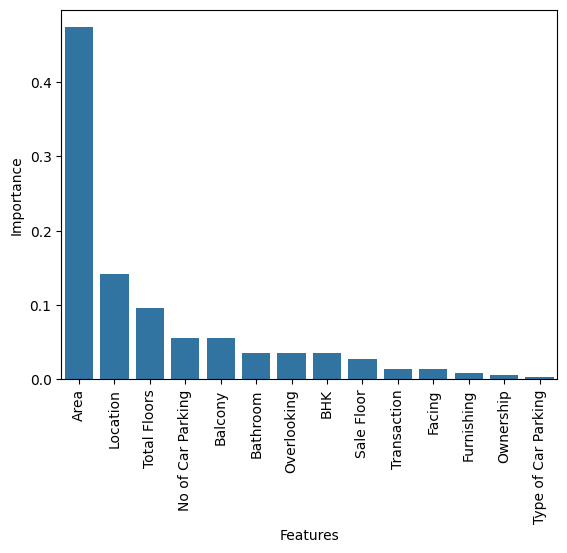

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(important_features,x="Features",y="Importance")
plt.xticks(rotation=90)
plt.show()

From the above table we could see that "Area", "Location", "Total Floor" are importtant features.

In [36]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()
lasso=Lasso()
ridge=Ridge()

ridge.fit(X_train_transformed,y_train)

Ridge()

In [ ]:
ridge.coef_

array([ 3.11450199e+01, -1.90193044e+00, -1.29241514e+01,  6.82305086e+01,
       -2.56848526e-02,  1.19176621e+00,  2.05362454e+01, -2.59528139e-02,
       -1.01963475e-01, -3.11921690e+00,  9.80602520e-01, -1.32679842e+00,
       -8.88959884e+00, -4.03840987e+00])

In [ ]:
ridge.feature_names_in_

array(['Bathroom', 'Balcony', 'BHK', 'Area', 'No of Car Parking',
       'Sale Floor', 'Total Floors', 'Location', 'Transaction',
       'Furnishing', 'Facing', 'Overlooking', 'Ownership',
       'Type of Car Parking'], dtype=object)

In [ ]:
importance_with_ridge=pd.concat([pd.DataFrame(ridge.feature_names_in_,columns=["Features"]),pd.DataFrame(ridge.coef_,columns=["Coefficients"])],axis=1).sort_values("Coefficients",ascending=False)

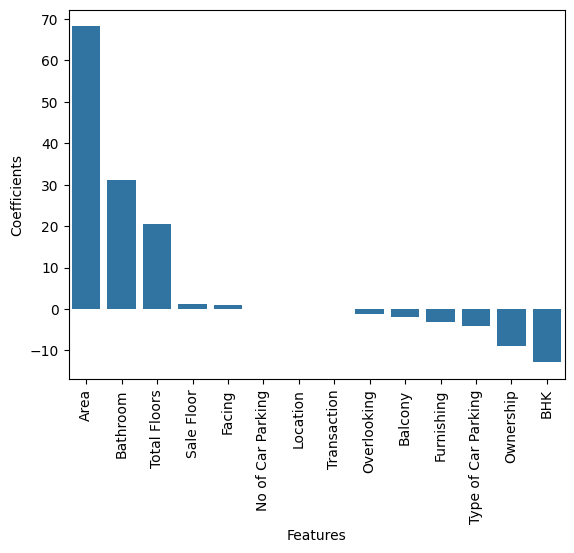

In [ ]:
sns.barplot(importance_with_ridge,x="Features",y="Coefficients")
plt.xticks(rotation=90)
plt.show()

We can see that "Area", "Bathroom" and "Total Floors" have higher importance.

##Model Evaluation on Training Data

In [ ]:
objects=[DTR,KNN,SV,LR,TR,HR,RR,GBDT,RF,ridge,lasso,elasticnet]
mse_list=[]
mae_list=[]
rmse_list=[]
r2_list=[]
n = X_test_transformed.shape[0]
p = X_test_transformed.shape[1]
adjusted_r2_list=[]

for i in objects:
    i.fit(X_train_transformed,y_train)
    y_train_pred=i.predict(X_train_transformed)

    mse_list.append(metrics.mean_squared_error(y_train,y_train_pred))
    mae_list.append(metrics.mean_absolute_error(y_train,y_train_pred))
    rmse_list.append(metrics.mean_squared_error(y_train,y_train_pred)**(1/2))
    r2=metrics.r2_score(y_train,y_train_pred)
    r2_list.append(r2)
    adjusted_r2_list.append(1-((1-r2)*(n-1))/(n-p-1))

In [ ]:
pd.DataFrame({"Model":[str(i).split("(")[0] for i in objects],
              "mse":mse_list,"mae":mae_list,"rmse":rmse_list,"r2":r2_list,"adjusted_r2":adjusted_r2_list})

,Model,mse,mae,rmse,r2,adjusted_r2
0,DecisionTreeRegressor,2.383506,0.130467,1.543861,0.999892,0.999892
1,KNeighborsRegressor,4987.383825,25.241719,70.621412,0.774589,0.774237
2,SVR,18327.461727,48.400631,135.378956,0.171668,0.170374
3,LinearRegression,12415.385237,51.247661,111.424348,0.438872,0.437995
4,TheilSenRegressor,368718.853199,76.261571,607.222244,-15.664690,-15.690729
5,HuberRegressor,14152.330738,44.175670,118.963569,0.360368,0.359369
6,RANSACRegressor,55814.273630,67.626729,236.250447,-1.522593,-1.526535
7,GradientBoostingRegressor,4984.261242,32.386188,70.599301,0.774730,0.774378
8,RandomForestRegressor,865.017401,10.034064,29.411178,0.960905,0.960843
9,Ridge,12415.385242,51.247456,111.424348,0.438872,0.437995


We can observe that DecisionTreeRegressor, KNeighborsRegressor, GradientBoostingRegressor and RandomForestRegressor have learned better.

In [ ]:
residual=y_train-LR.predict(X_train_transformed)

<Axes: xlabel='Amount', ylabel='Density'>

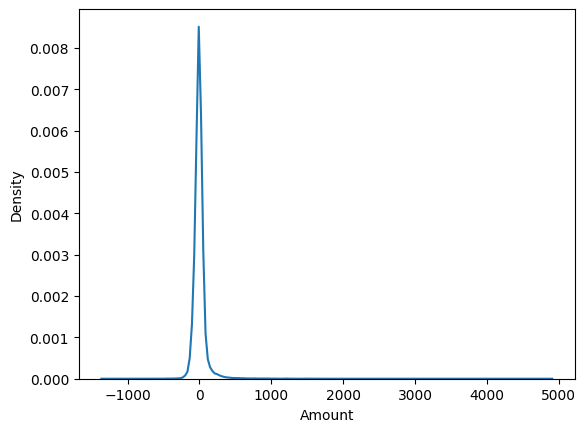

In [ ]:
sns.kdeplot(residual)

In [ ]:
residual.mean()

-9.907388654112556e-15

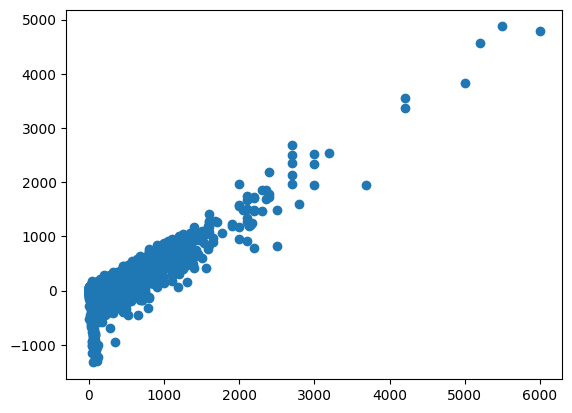

In [ ]:
plt.scatter(y_train,residual)

<Axes: xlabel='Amount', ylabel='Density'>

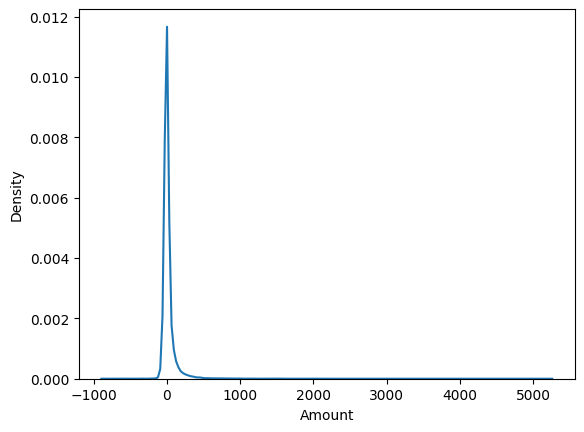

In [ ]:
residual=y_train-HR.predict(X_train_transformed)
sns.kdeplot(residual)

In [ ]:
residual.mean()

18.365510595997737

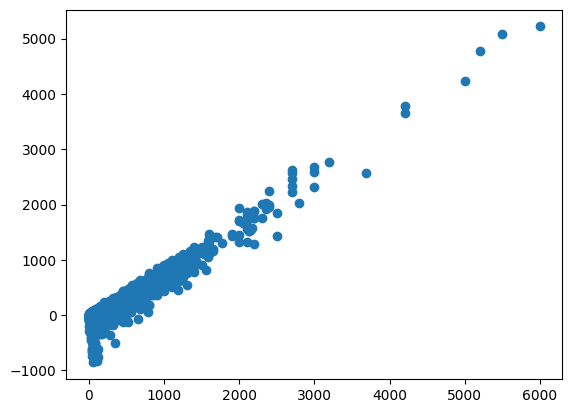

In [ ]:
plt.scatter(y_train,residual)

We can see that both the Huber Regression and Linear Regression are not good for prediction, since there residuals do not have 0 mean and follows a pattern.

## Model Evaluation on Test Data

In [37]:
import time
objects=[DTR,KNN,LR,HR,GBDT,RF,ridge,lasso,elasticnet]

train_time=[]
predict_time=[]
mse_list=[]
mae_list=[]
rmse_list=[]
r2_list=[]
n = X_test_transformed.shape[0]
p = X_test_transformed.shape[1]
adjusted_r2_list=[]

for i in objects:
    start=time.time()
    i.fit(X_train_transformed,y_train)
    end=time.time()
    train_time.append(end-start)
    y_pred=i.predict(X_test_transformed)
    predict_time.append(time.time()-end)

    mse_list.append(metrics.mean_squared_error(y_test,y_pred))
    mae_list.append(metrics.mean_absolute_error(y_test,y_pred))
    rmse_list.append(metrics.mean_squared_error(y_test,y_pred)**(1/2))
    r2=metrics.r2_score(y_test,y_pred)
    r2_list.append(r2)
    adjusted_r2_list.append(1-((1-r2)*(n-1))/(n-p-1))

In [38]:
table=pd.DataFrame({"Model":[str(i).split("(")[0] for i in objects],"Training_time":train_time,"Predicting_time":predict_time,
              "mse":mse_list,"mae":mae_list,"rmse":rmse_list,"r2":r2_list,"adjusted_r2":adjusted_r2_list})

In [39]:
table

,Model,Training_time,Predicting_time,mse,mae,rmse,r2,adjusted_r2
0,DecisionTreeRegressor,1.720960,0.015899,8671.184877,35.424661,93.119197,0.594720,0.594087
1,KNeighborsRegressor,0.603500,3.967399,6883.298237,30.810188,82.965645,0.678284,0.677781
2,LinearRegression,0.074486,0.010659,12801.388275,51.397729,113.143220,0.401680,0.400745
3,HuberRegressor,5.792751,0.018613,14098.006126,44.182237,118.735025,0.341077,0.340048
4,GradientBoostingRegressor,9.734706,0.017776,7031.808674,33.834337,83.855880,0.671342,0.670829
5,RandomForestRegressor,34.413291,0.599616,5639.607678,27.219240,75.097321,0.736412,0.736000
6,Ridge,0.024433,0.005527,12801.366993,51.397524,113.143126,0.401681,0.400746
7,Lasso,0.060263,0.007390,12797.951208,51.243515,113.128030,0.401840,0.400906
8,ElasticNet,0.063806,0.011898,13098.589097,49.834915,114.449068,0.387789,0.386832


* From the above training results, we can observe that Decision Tree, KNN, Gradient Boosting, and Random Forest Regressor have learned well since they have more than 0.77 adjusted r-squared values.
* But when it came to testing, we could see that Decision Tree and Random Forest overfitted. KNN and Gradient Boosting Regressor were close to best fit.
Moreover, the predicting time for KNN was higher than the Gradient Boosting Regressor.
* Therefore, Cross Validation to find the best fit was conducted for the Gradient Boosting Regressor.


#HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

tuning=GridSearchCV(estimator=GradientBoostingRegressor(),
                    param_grid={'max_depth':[5],'learning_rate': [0.2],'loss':['huber'],'alpha':[0.5], 'min_samples_split':[6],'min_samples_leaf': [2, 3, 4, 5]},
                    scoring="r2",
                    cv=5,
                    return_train_score=True,
                    verbose=3)

tuning.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END alpha=0.5, learning_rate=0.2, loss=huber, max_depth=5, min_samples_leaf=2, min_samples_split=6;, score=(train=0.748, test=0.664) total time=  13.3s
[CV 2/5] END alpha=0.5, learning_rate=0.2, loss=huber, max_depth=5, min_samples_leaf=2, min_samples_split=6;, score=(train=0.718, test=0.722) total time=  10.7s
[CV 3/5] END alpha=0.5, learning_rate=0.2, loss=huber, max_depth=5, min_samples_leaf=2, min_samples_split=6;, score=(train=0.733, test=0.682) total time=  10.4s
[CV 4/5] END alpha=0.5, learning_rate=0.2, loss=huber, max_depth=5, min_samples_leaf=2, min_samples_split=6;, score=(train=0.730, test=0.660) total time=   9.5s
[CV 5/5] END alpha=0.5, learning_rate=0.2, loss=huber, max_depth=5, min_samples_leaf=2, min_samples_split=6;, score=(train=0.739, test=0.696) total time=  10.7s
[CV 1/5] END alpha=0.5, learning_rate=0.2, loss=huber, max_depth=5, min_samples_leaf=3, min_samples_split=6;, score=(train=0.746, test=

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.5], 'learning_rate': [0.2],
                         'loss': ['huber'], 'max_depth': [5],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [6]},
             return_train_score=True, scoring='r2', verbose=3)

In [ ]:
GBDT_tuned=GradientBoostingRegressor(max_depth=5, loss="huber", learning_rate=0.2, alpha=0.75, min_samples_split=6, min_samples_leaf=5)
objects=[GBDT_tuned]
mse_list=[]
mae_list=[]
rmse_list=[]
r2_list=[]
n = X_test_transformed.shape[0]
p = X_test_transformed.shape[1]
adjusted_r2_list=[]

for i in objects:
    i.fit(X_train_transformed,y_train)
    y_train_pred=i.predict(X_train_transformed)

    mse_list.append(metrics.mean_squared_error(y_train,y_train_pred))
    mae_list.append(metrics.mean_absolute_error(y_train,y_train_pred))
    rmse_list.append(metrics.mean_squared_error(y_train,y_train_pred)**(1/2))
    r2=metrics.r2_score(y_train,y_train_pred)
    r2_list.append(r2)
    adjusted_r2_list.append(1-((1-r2)*(n-1))/(n-p-1))

In [ ]:
pd.DataFrame({"Model":[str(i).split("(")[0] for i in objects],
              "mse":mse_list,"mae":mae_list,"rmse":rmse_list,"r2":r2_list,"adjusted_r2":adjusted_r2_list})

,Model,mse,mae,rmse,r2,adjusted_r2
0,GradientBoostingRegressor,5691.440942,25.746213,75.441639,0.742769,0.742367


In [ ]:
train_time=[]
predict_time=[]
mse_list=[]
mae_list=[]
rmse_list=[]
r2_list=[]
n = X_test_transformed.shape[0]
p = X_test_transformed.shape[1]
adjusted_r2_list=[]

start=time.time()
GBDT_tuned.fit(X_train_transformed,y_train)
end=time.time()
train_time.append(end-start)
y_pred=GBDT_tuned.predict(X_test_transformed)
predict_time.append(time.time()-end)

mse_list.append(metrics.mean_squared_error(y_test,y_pred))
mae_list.append(metrics.mean_absolute_error(y_test,y_pred))
rmse_list.append(metrics.mean_squared_error(y_test,y_pred)**(1/2))
r2=metrics.r2_score(y_test,y_pred)
r2_list.append(r2)
adjusted_r2_list.append(1-((1-r2)*(n-1))/(n-p-1))

In [ ]:
pd.DataFrame({"Model":[str(i).split("(")[0] for i in objects],"Training_time":train_time,"Predicting_time":predict_time,
              "mse":mse_list,"mae":mae_list,"rmse":rmse_list,"r2":r2_list,"adjusted_r2":adjusted_r2_list})

,Model,Training_time,Predicting_time,mse,mae,rmse,r2,adjusted_r2
0,GradientBoostingRegressor,12.910787,0.025566,7066.758656,27.736129,84.064015,0.669709,0.669193


The best fit is GradientBoostingRegressor with max_depth=5, loss="huber", learning_rate=0.2, alpha=0.75, min_samples_split=6, min_samples_leaf=5